# perceptron coding workflow

## 1 initialisation of parameters(w, b)

## 2 iterative algorithm
### 2.1 Model function(X,W,b)
#### 2.1.1 Linear function(Z=X.W+b)
#### 2.1.2 Activation function(A=1/1+e-Z)
### 2.2 Evaluation function(A,y)
### 2.3 Gradient descent(A,X,y)
### 2.4 Update(W,b,dw,db)

In [1]:
# import packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [3]:
# datasets

In [6]:
X,y=make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y=y.reshape((y.shape[0],1))

In [7]:
print(X.shape)

(100, 2)


In [4]:
print(y.shape)

(100, 1)


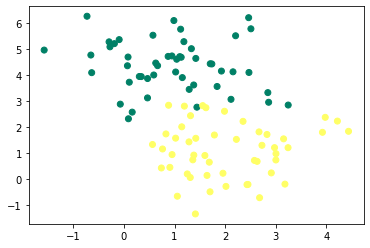

In [8]:
plt.scatter(X[:,0],X[:,1], c=y,cmap='summer')

# Initialization function

In [9]:
def initialization(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

# Model function

In [10]:
def model(X, W, b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

# Cost function

In [11]:
def log_loss(A,y):
    return 1/len(y) * np.sum(-y* np.log(A)- (1-y)*np.log(1-A))

# Gradiens

In [12]:
def gradients(A,X,y):
    dw=1/len(y)*np.dot(X.T, A-y)
    db=1/len(y)*np.sum(A-y)
    return (dw, db)

# Update function

In [13]:
def update(dw, db,W,b,lr):
    W=W - lr*dw
    b=b-lr*db
    return(W,b)

In [22]:
def predict(X,W,b):
    A=model(X,W,b)
    return A >=0.5

# Perceptron

In [24]:
def preceptron(X,y,lr=0.1,n_iter=100):
    #initilization
    W,b=initialization(X)
    Loss=[]
    for i in range(n_iter):
        A= model(X,W,b)
        Loss.append(log_loss(A,y)) 
        dw,db=gradients(A,X,y)
        W,b=update(dw,db,W,b,lr)
    y_pred= predict(X,W,b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(Loss)


0.89


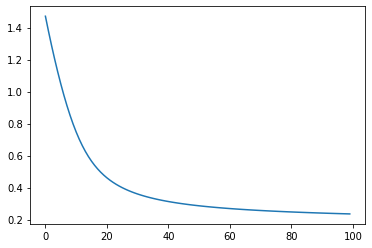

In [36]:
preceptron(X,y)